In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
prices_day_1 =pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\prices_round_4_day_1.csv",sep =";")
prices_day_2 =pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\prices_round_4_day_2.csv",sep =";")
prices_day_3 =pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\prices_round_4_day_3.csv",sep =";")
prices_day_4 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round5\Miquel\round-5-island-data-bottle\prices_round_5_day_4.csv", sep=";")
prices_day_1["day"] = 1
prices_day_2["day"] = 2
prices_day_3["day"] = 3
prices_day_4["day"] = 4
prices = pd.concat([prices_day_1, prices_day_2, prices_day_3, prices_day_4], ignore_index=True)
prices.reset_index(inplace=True, drop=True)
prices["mid"] = (prices["ask_price_1"] + prices["bid_price_1"]) / 2

In [44]:
temp = prices[prices["product"] == "temp"]
rainforest_resin = prices[prices["product"] == "RAINFOREST_RESIN"]
squid_ink = prices[prices["product"] == "SQUID_INK"]

In [45]:
squid_ink[squid_ink["day"] ==1]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mid
8,1,0,SQUID_INK,1834.0,23.0,NaN,NaN,NaN,NaN,1838.0,23.0,NaN,NaN,NaN,NaN,1836.0,0.0,1836.0
18,1,100,SQUID_INK,1838.0,1.0,1837.0,2.0,1836.0,22.0,1839.0,22.0,NaN,NaN,NaN,NaN,1838.5,0.0,1838.5
34,1,200,SQUID_INK,1839.0,22.0,NaN,NaN,NaN,NaN,1842.0,22.0,NaN,NaN,NaN,NaN,1840.5,0.0,1840.5
55,1,300,SQUID_INK,1843.0,1.0,1841.0,26.0,NaN,NaN,1844.0,26.0,NaN,NaN,NaN,NaN,1843.5,0.0,1843.5
61,1,400,SQUID_INK,1842.0,28.0,NaN,NaN,NaN,NaN,1845.0,28.0,NaN,NaN,NaN,NaN,1843.5,0.0,1843.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149938,1,999500,SQUID_INK,1878.0,1.0,1876.0,25.0,NaN,NaN,1879.0,25.0,NaN,NaN,NaN,NaN,1878.5,0.0,1878.5
149943,1,999600,SQUID_INK,1879.0,2.0,1878.0,24.0,NaN,NaN,1881.0,24.0,NaN,NaN,NaN,NaN,1880.0,0.0,1880.0
149963,1,999700,SQUID_INK,1878.0,30.0,NaN,NaN,NaN,NaN,1879.0,1.0,1882.0,30.0,NaN,NaN,1878.5,0.0,1878.5
149984,1,999800,SQUID_INK,1881.0,24.0,NaN,NaN,NaN,NaN,1883.0,8.0,1884.0,24.0,NaN,NaN,1882.0,0.0,1882.0


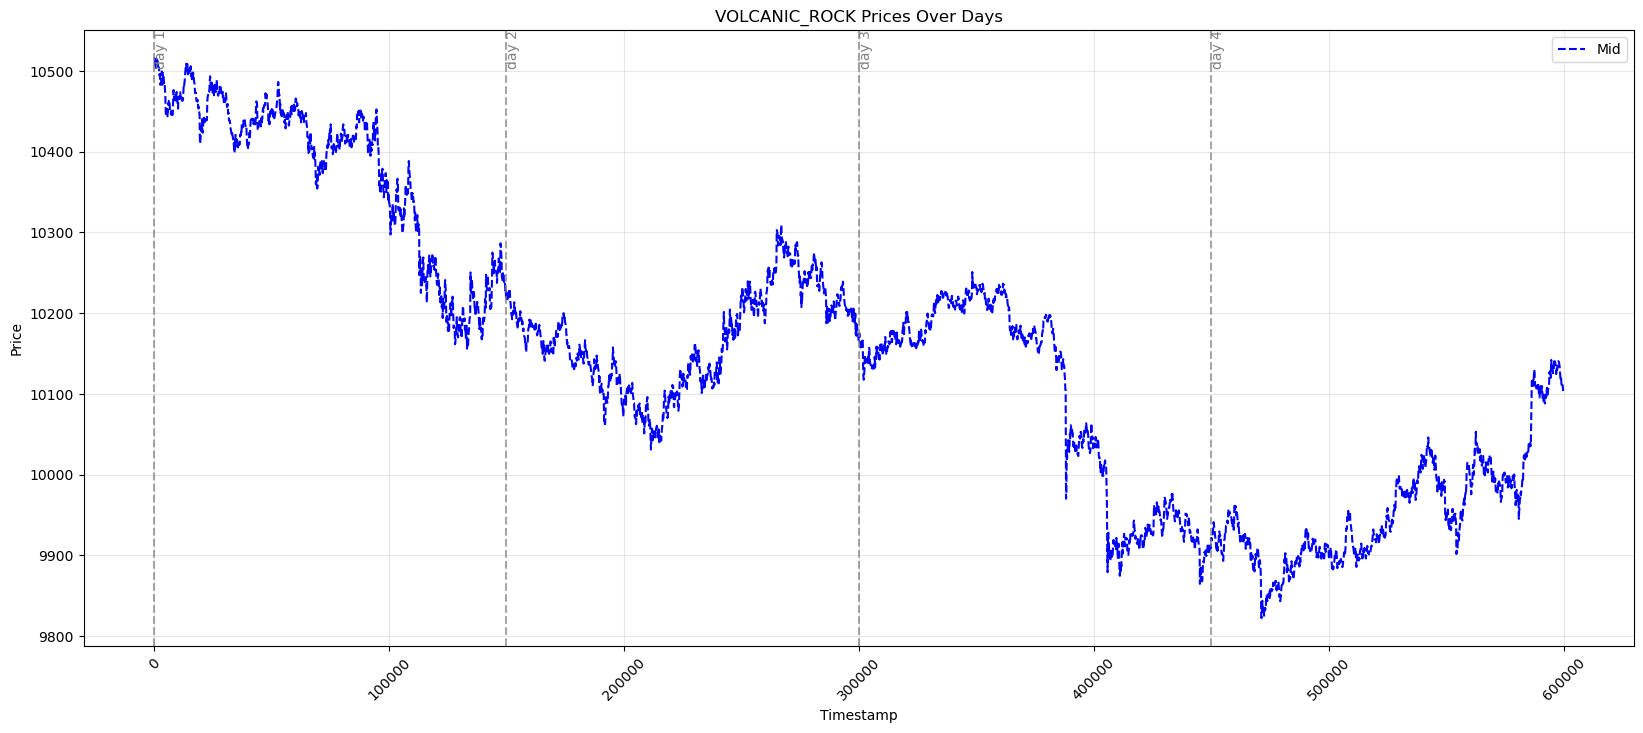

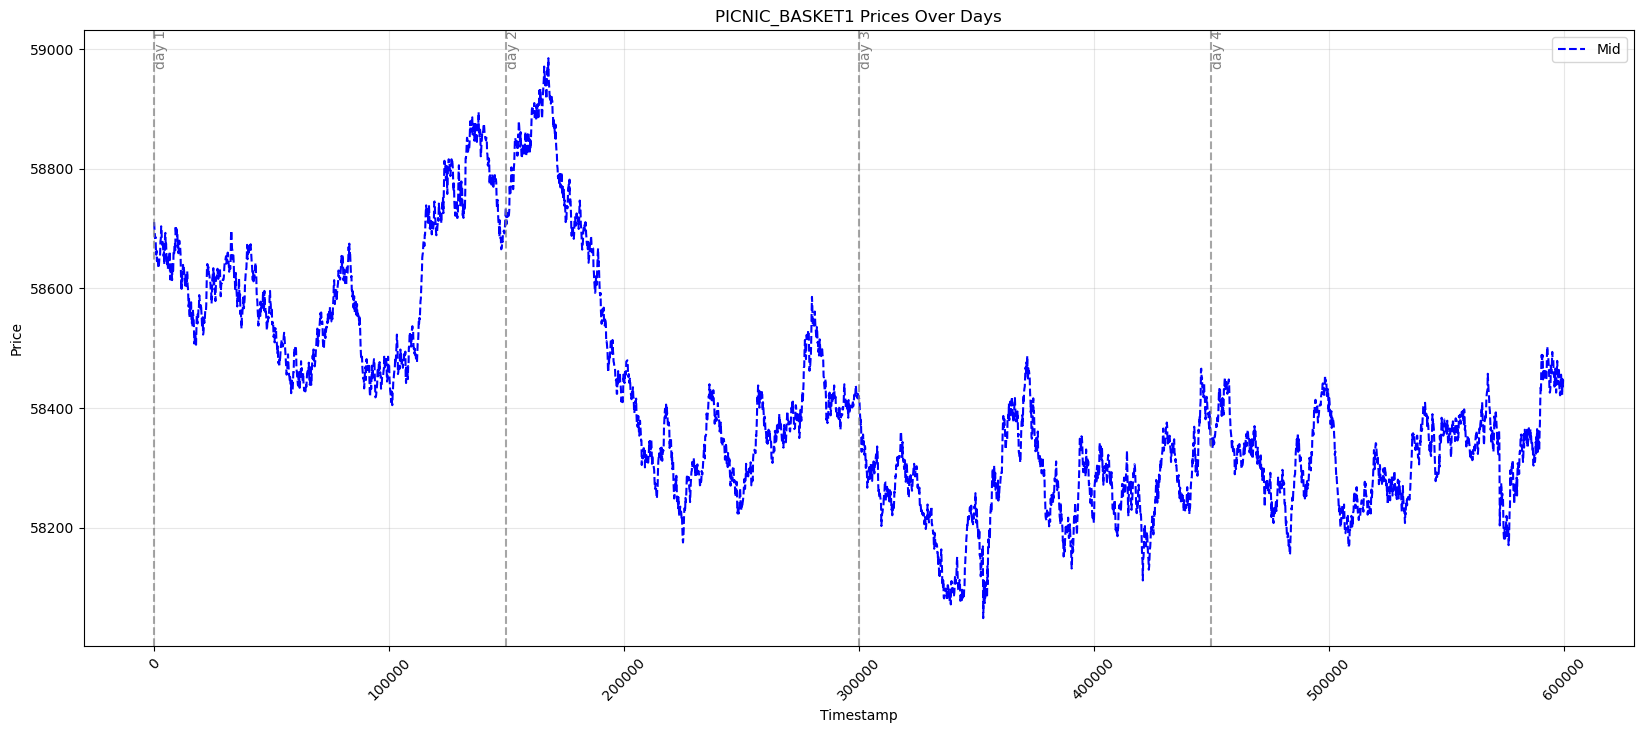

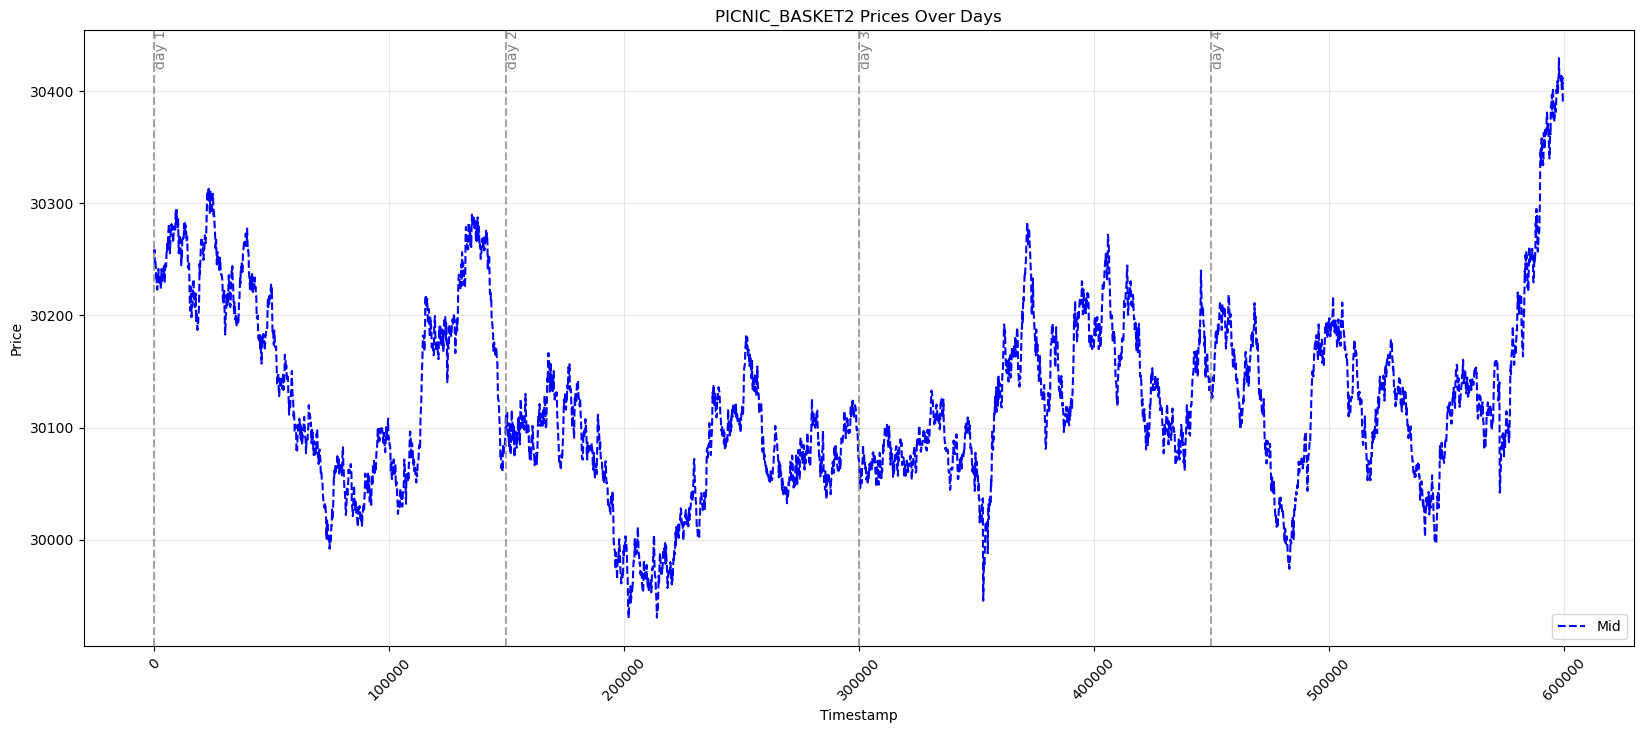

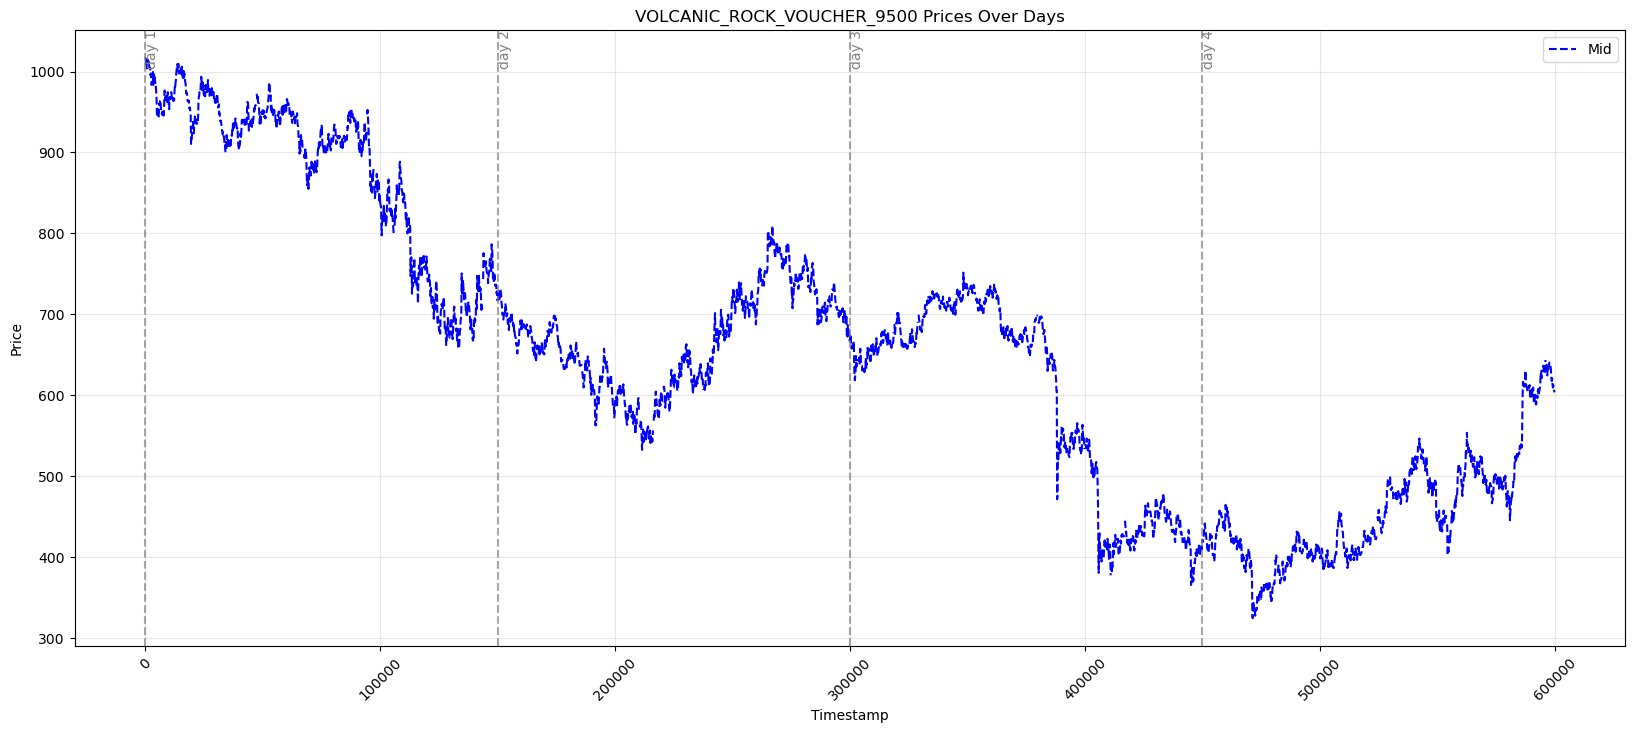

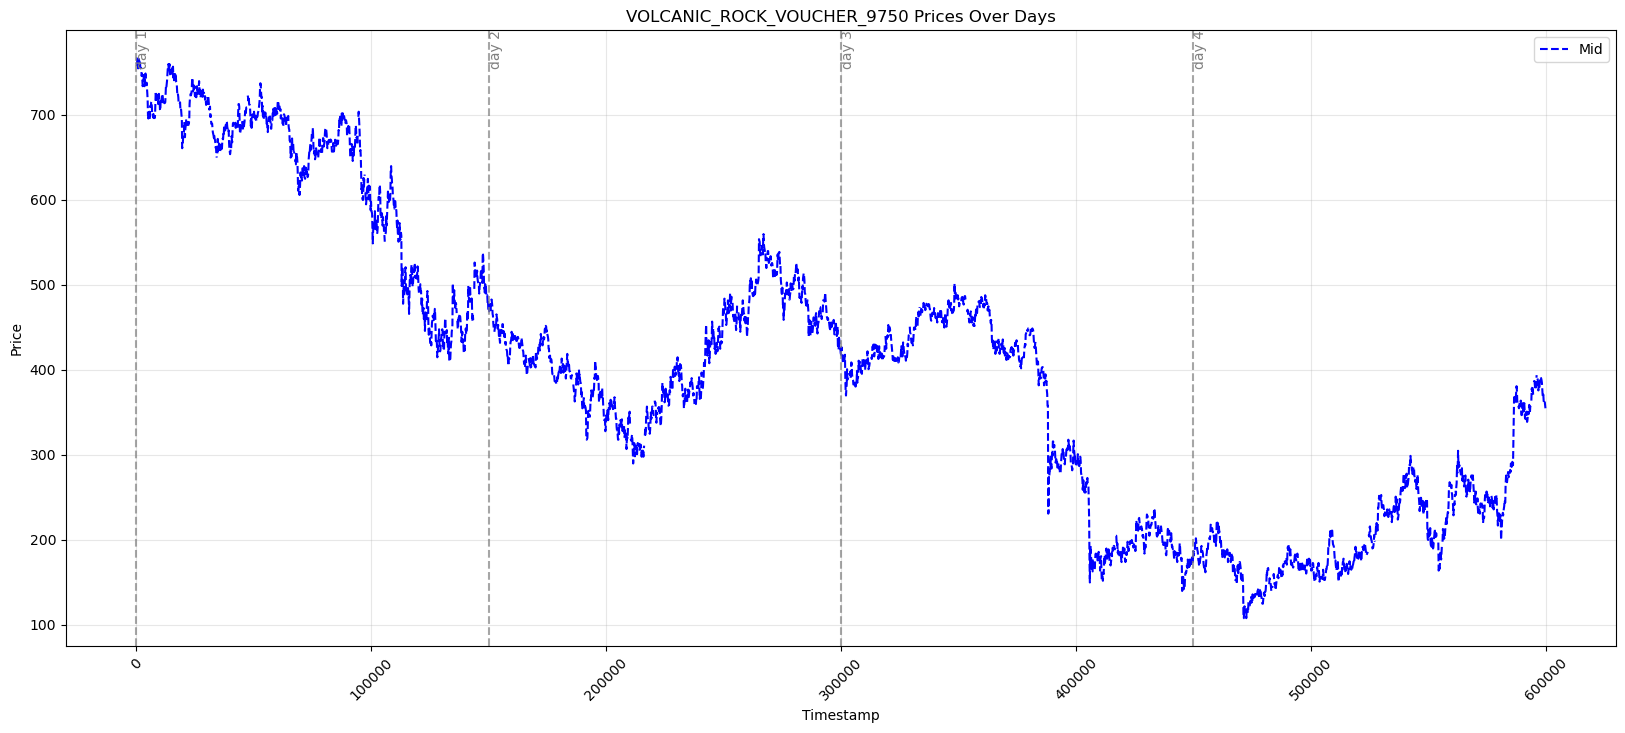

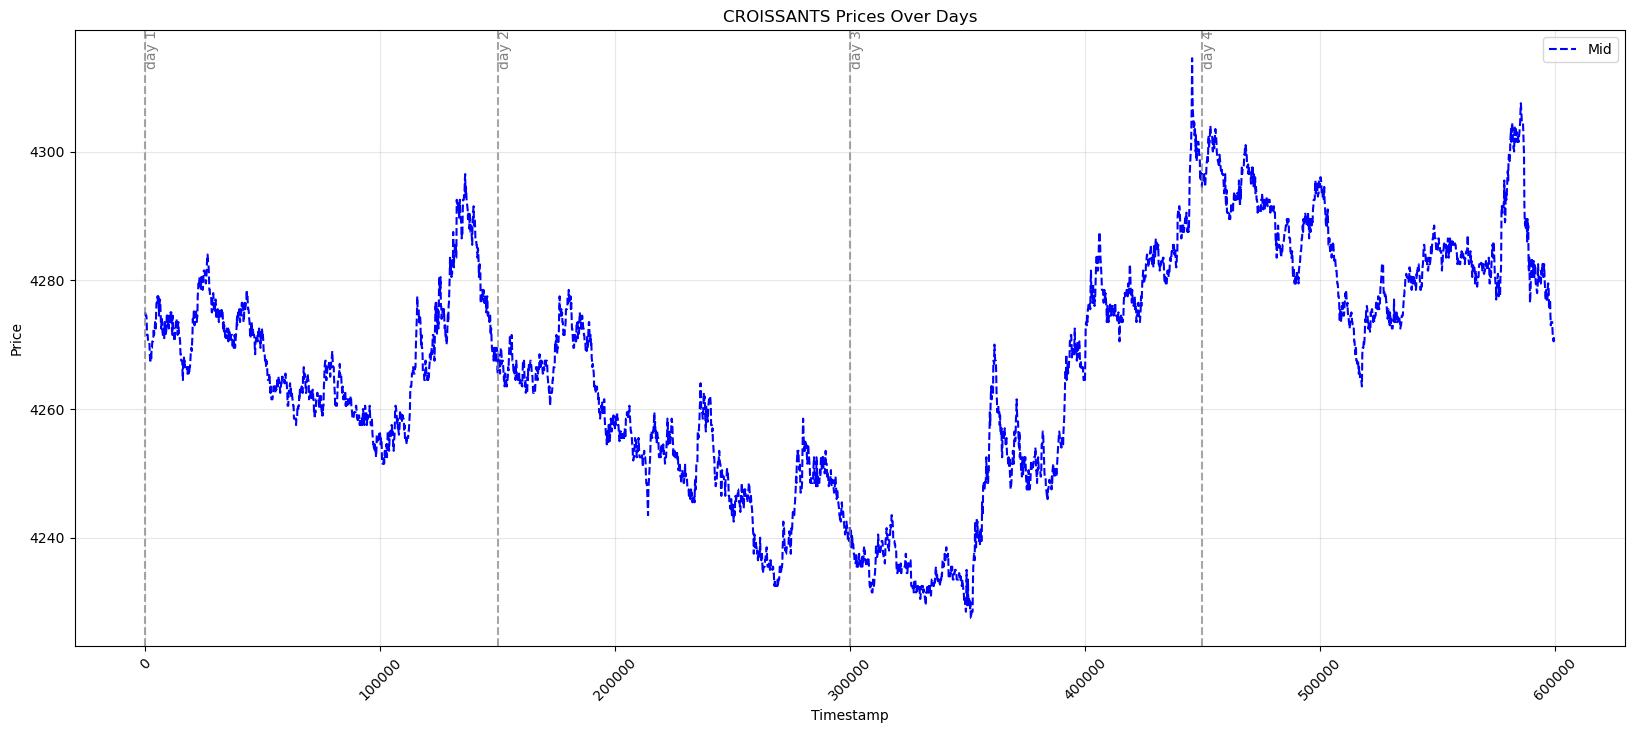

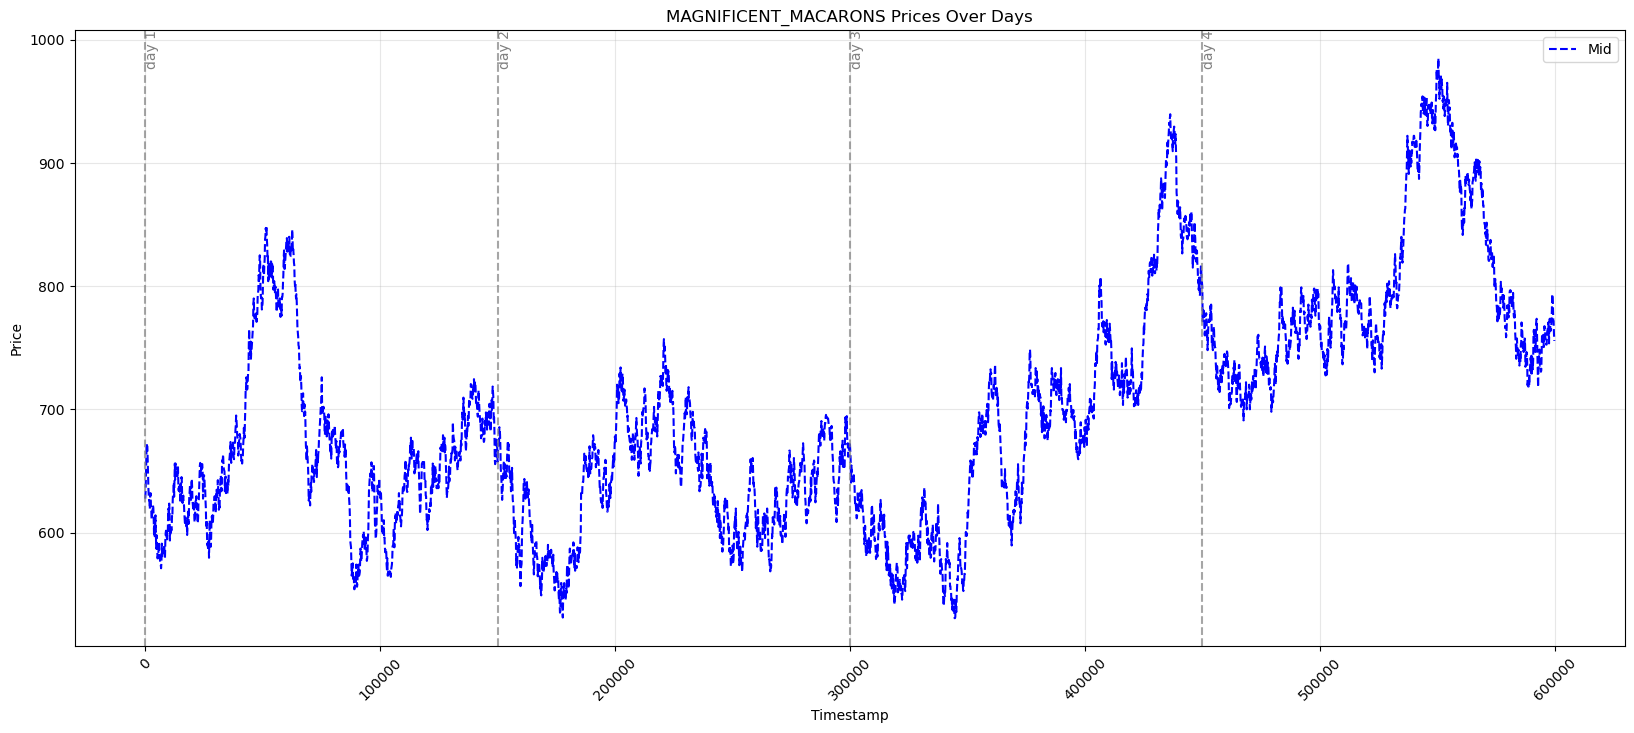

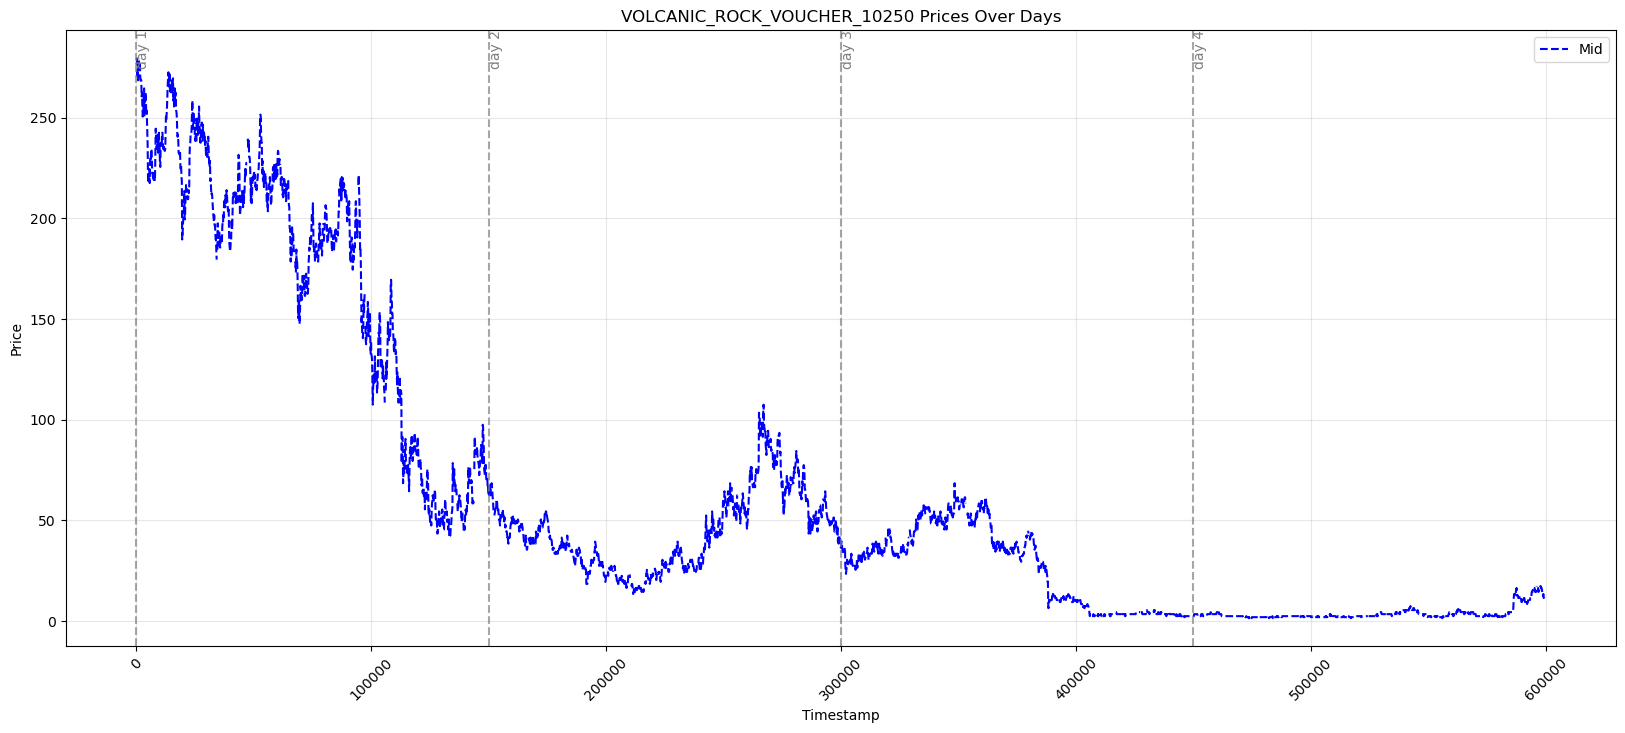

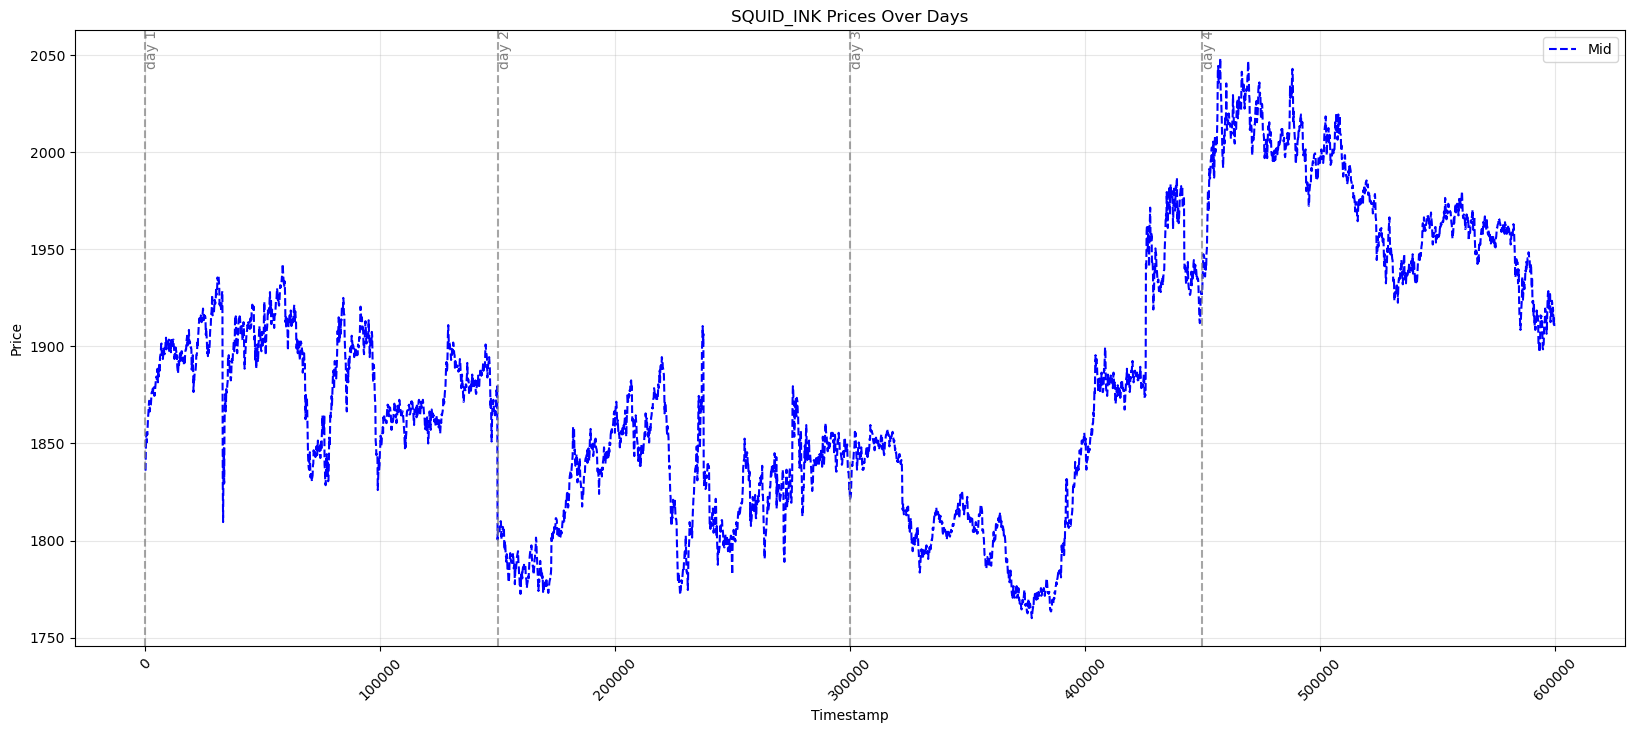

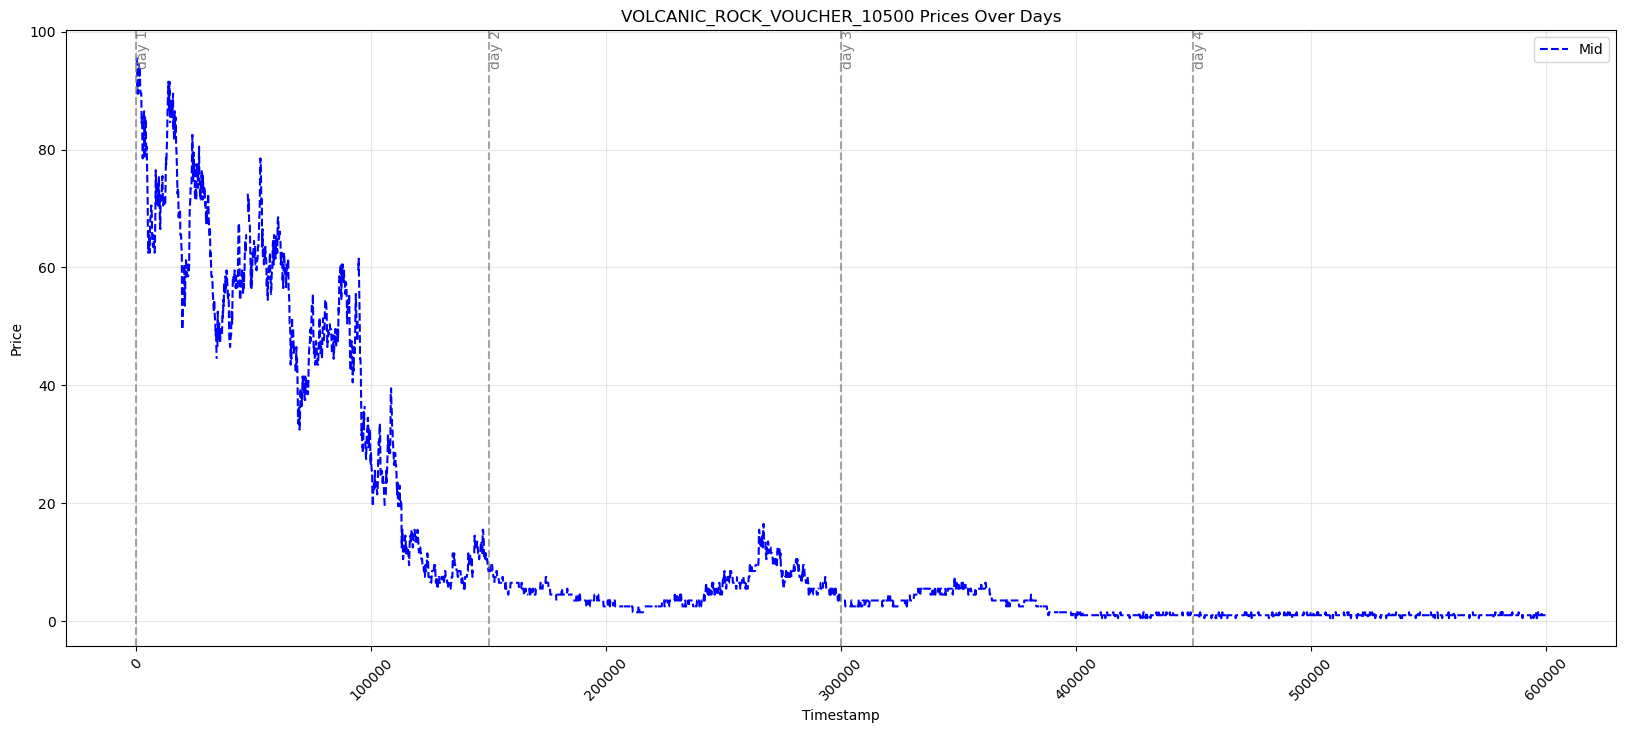

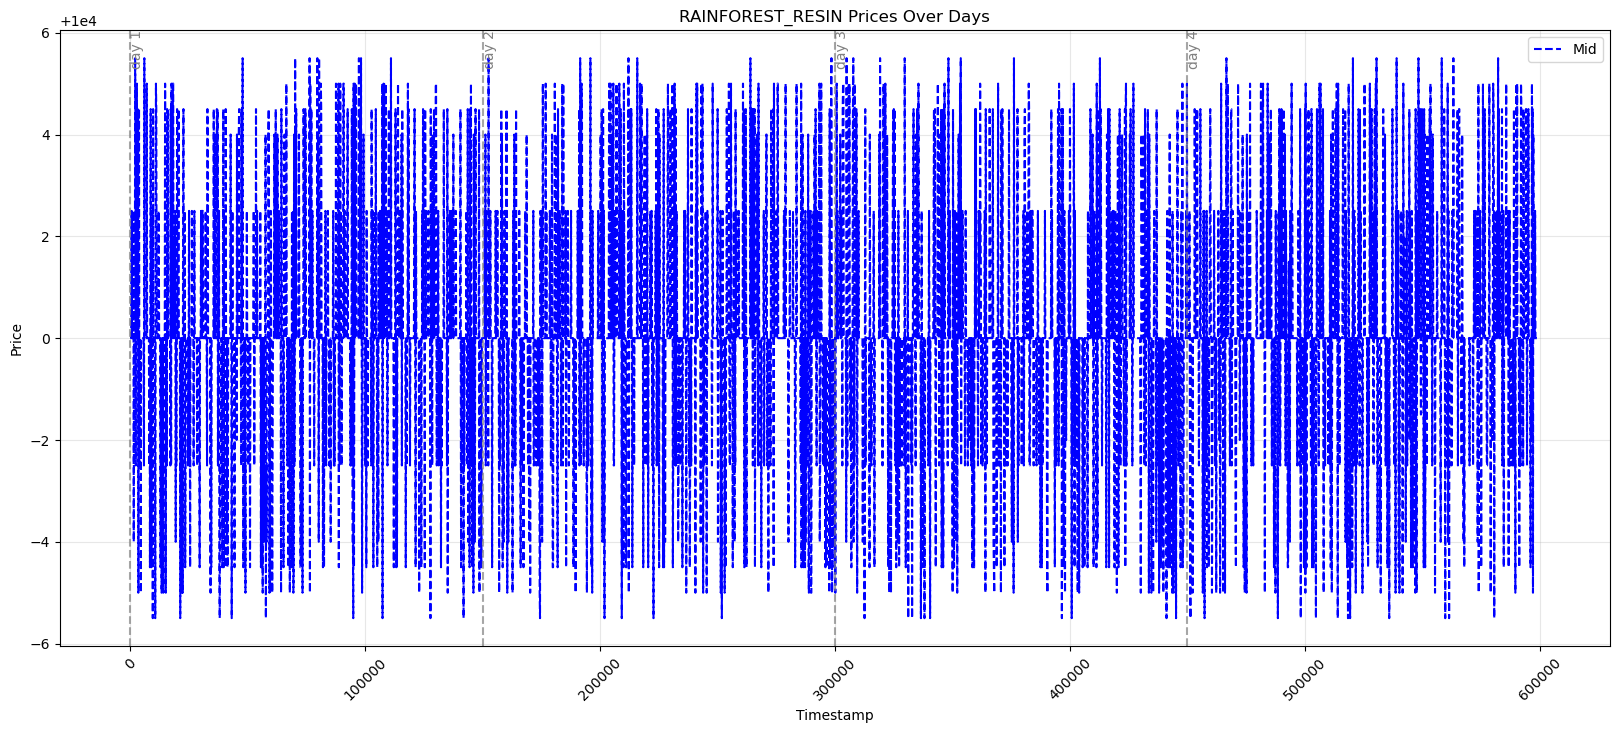

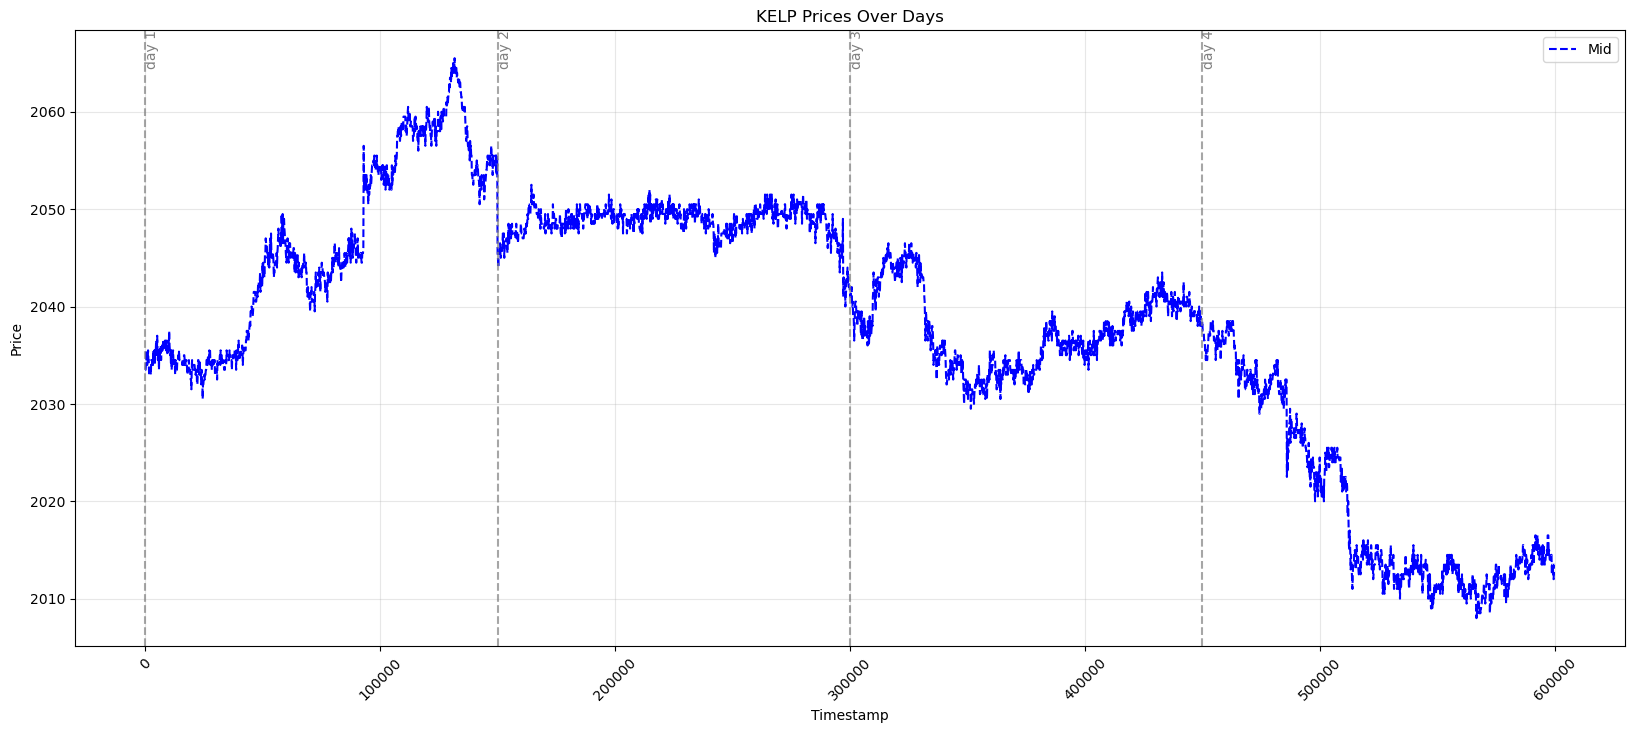

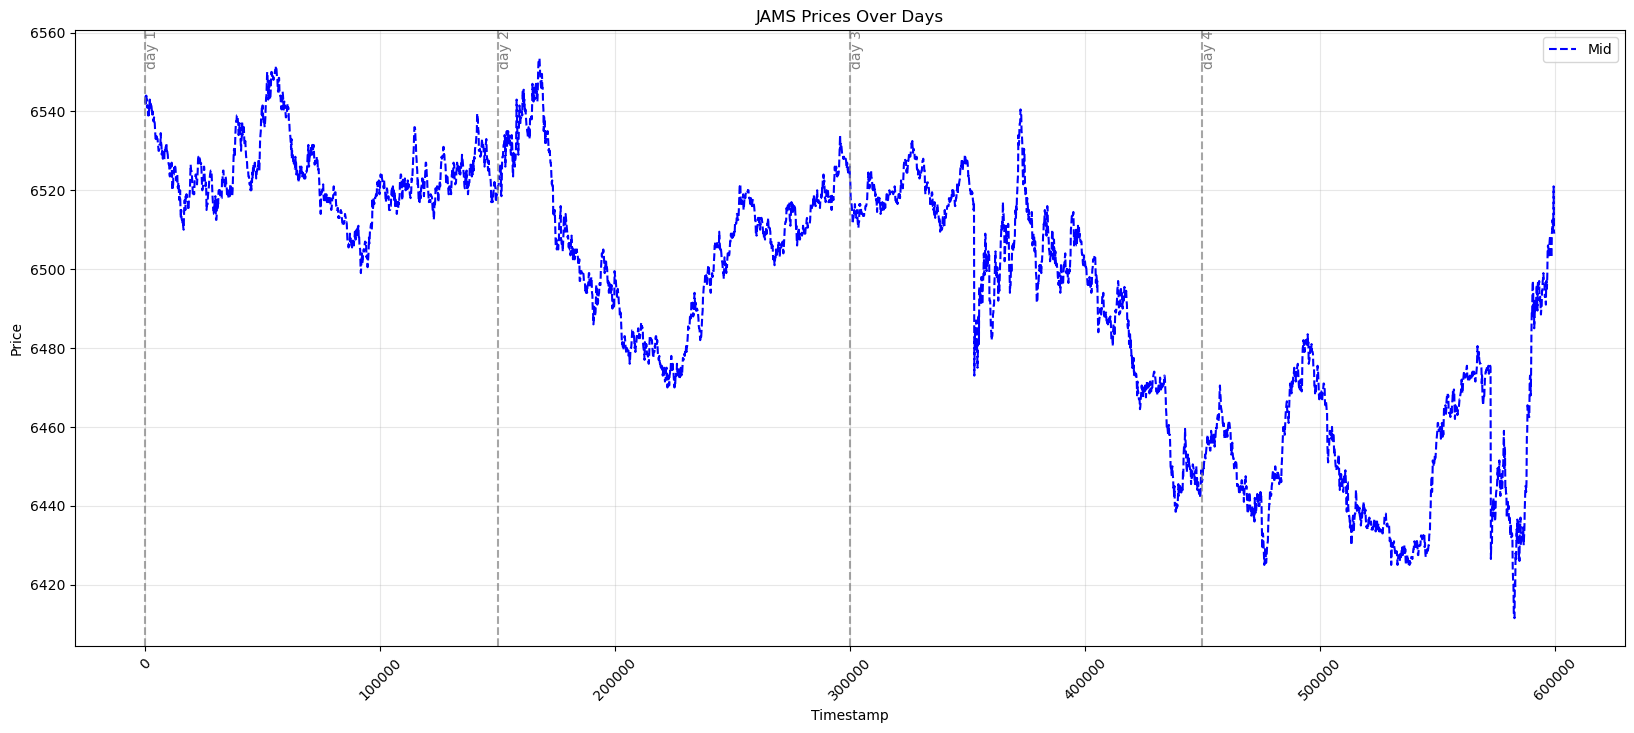

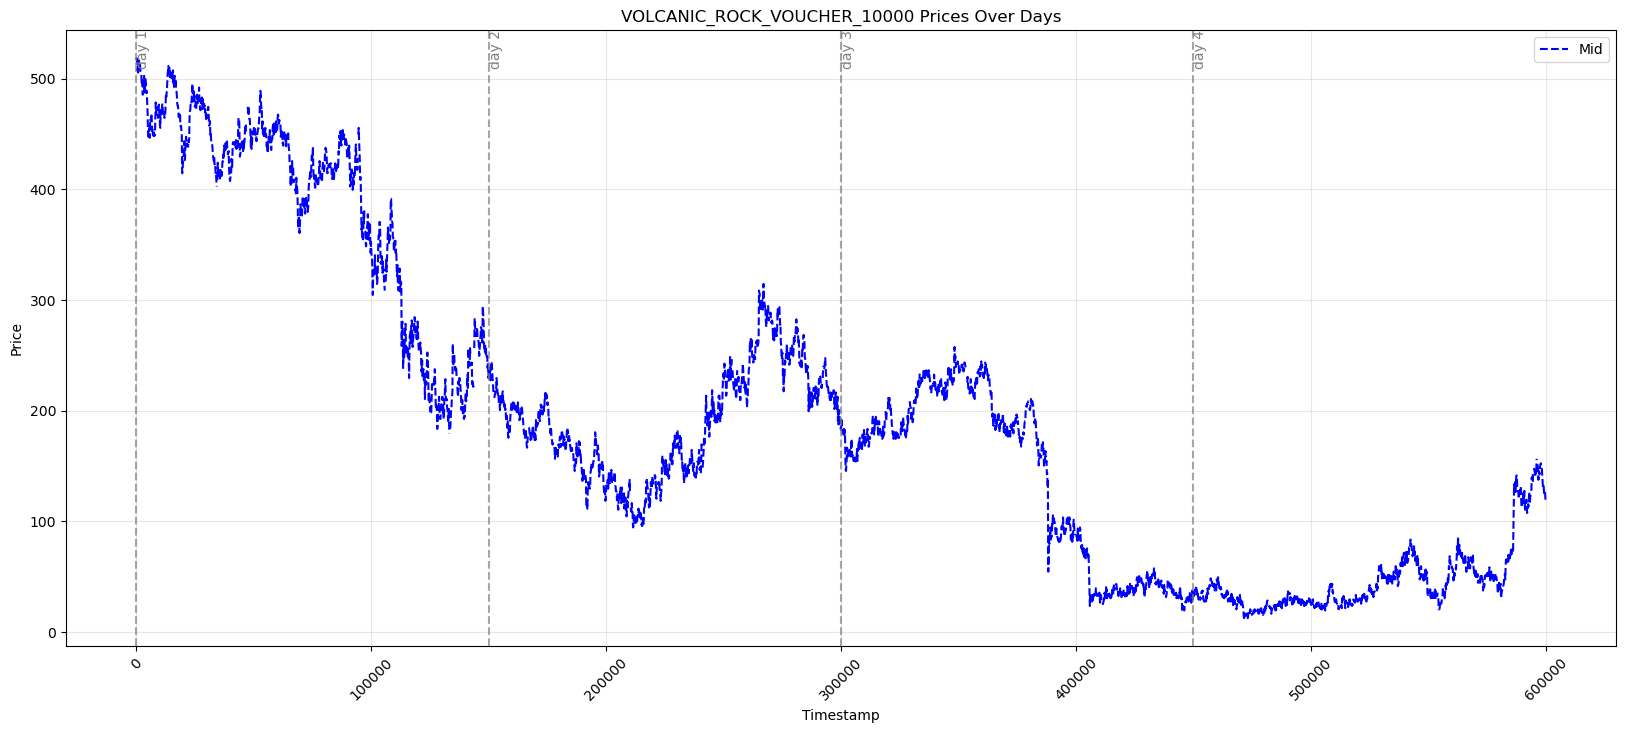

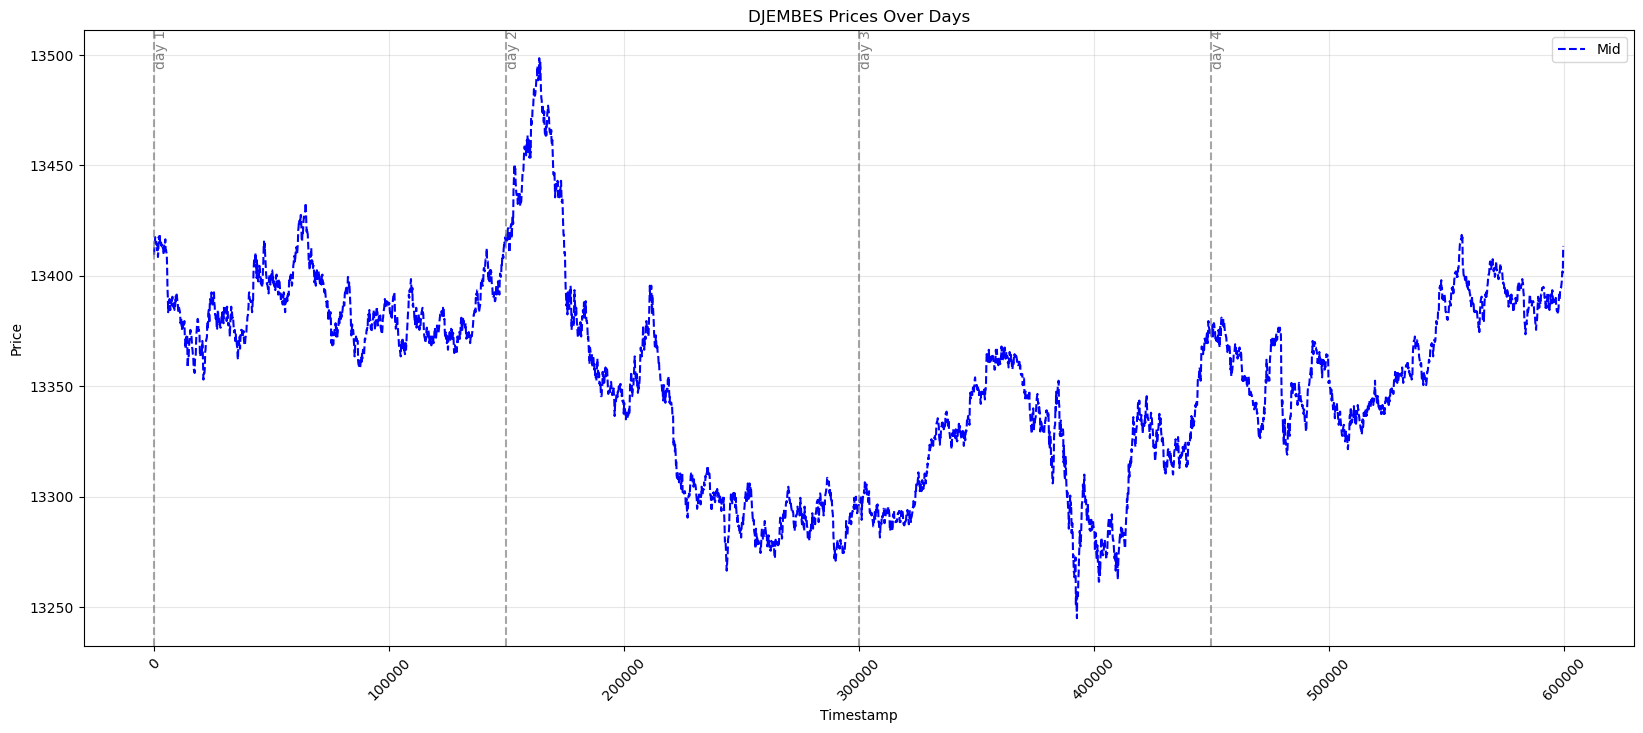

In [46]:
for prod in prices["product"].unique():
    temp = prices[prices["product"] == prod]
    plt.figure(figsize=(20, 8))
    plt.plot(temp.index[::10], temp["mid"][::10], label="Mid", color='blue', linestyle='--')
    plt.title(f"{prod} Prices Over Days")
    plt.xlabel("Timestamp")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)

    # Add vertical dashed lines every 100k with day labels starting from day -2
    unique_days = sorted(temp["day"].unique())  # expected: [-2, -1, 0, 1, 2, 3]
    for i, day in enumerate(unique_days):
        x_pos = temp[temp["day"] == day].index[0]  # Get the first index for each day
        plt.axvline(x=x_pos, color='gray', linestyle='--', alpha=0.7)
        y_top = plt.ylim()[1]
        plt.text(x_pos, y_top , f"day {day}", rotation=90,
                verticalalignment='top', color='gray', fontsize=10)

    plt.legend()
    plt.show()

